## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [5]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 867.07 KiB | 4.56 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
import numpy as np
import pandas as pd

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [17]:
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool

2.1

In [10]:

df = pd.read_csv('/content/assignment3/data/USA_cars_datasets.csv')

In [11]:
df = df.loc[:, ['price', 'year', 'mileage']] #dropping unneeded columns

In [12]:
df.head() #looking at head

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [13]:
df.shape #looking at shape

(2499, 3)

In [14]:
df['price'].isna().any()
df['year'].isna().any()
df['mileage'].isna().any() #There are no NA values to handle

False

In [15]:
y = df['price'] # Create target variable vector
X = df.loc[:,['year','mileage']] # Create feature matrix

2.2 Maxmin normalize year and mileage

In [10]:
#Define maxmin function - taken from lecture
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

In [17]:
X = X.apply(maxmin)

2.3 Split the sample into ~80% for training and ~20% for evaluation.

In [14]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

2.4 Do Knn, SSE, scatterplots

In [21]:
import seaborn as sns # imports
import matplotlib.pyplot as plt

In [22]:
#For k = 3, doing KNN
model_k3 = kNNRegression(n_neighbors=3)
fitted_model_k3 = model_k3.fit(X_train,y_train)
y_hat_k3 = fitted_model_k3.predict(X_test)

In [23]:
#Finding the SSE
SSE_test_k3 = np.sum( (y_test-y_hat_k3)**2 )
print("SSE for k = 3: ", SSE_test_k3)

SSE for k = 3:  63223286609.11111


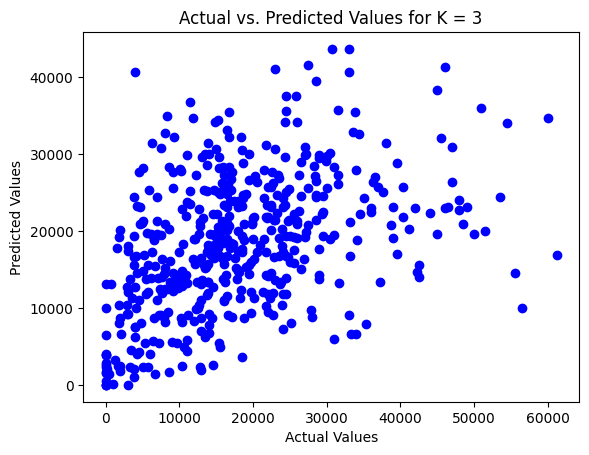

In [30]:
#Plot test against predicted values
plt.scatter(y_test, y_hat_k3, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for K = 3')
plt.show()

SSE for k = 10:  55401092793.409996


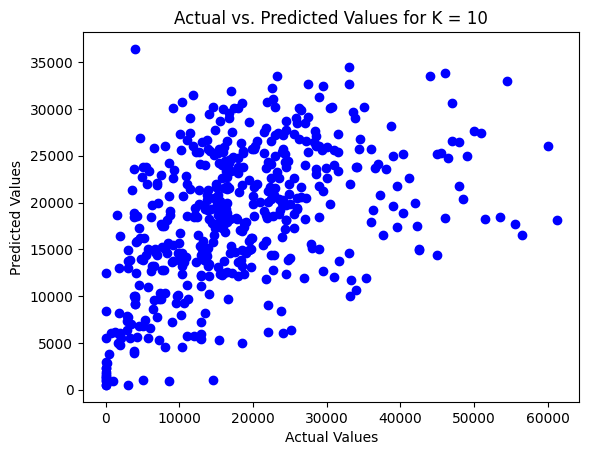

In [41]:
#For k = 10, doing KNN
model_k10 = kNNRegression(n_neighbors=10)
fitted_model_k10 = model_k10.fit(X_train,y_train)
y_hat_k10 = fitted_model_k10.predict(X_test)
#Finding the SSE
SSE_test_k10 = np.sum( (y_test-y_hat_k10)**2 )
print("SSE for k = 10: ", SSE_test_k10)
#Plot test against predicted values
plt.scatter(y_test, y_hat_k10, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for K = 10')
plt.show()

SSE for k = 25:  51585228924.304


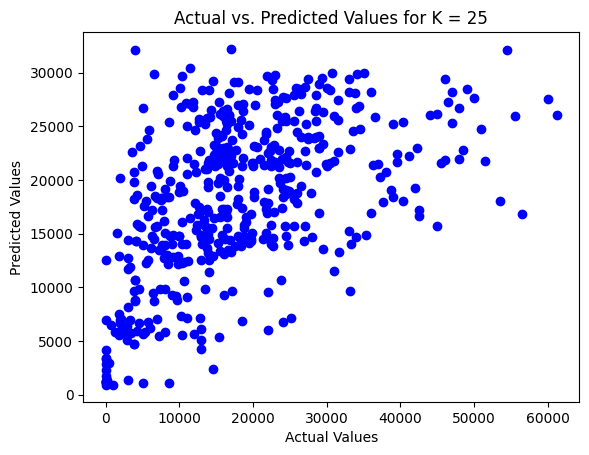

In [42]:
#For k = 25, doing KNN
model_k25 = kNNRegression(n_neighbors=25)
fitted_model_k25 = model_k25.fit(X_train,y_train)
y_hat_k25 = fitted_model_k25.predict(X_test)
#Finding the SSE
SSE_test_k25 = np.sum( (y_test-y_hat_k25)**2 )
print("SSE for k = 25: ", SSE_test_k25)
#Plot test against predicted values
plt.scatter(y_test, y_hat_k25, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for K = 25')
plt.show()

SSE for k = 50:  49847721982.09799


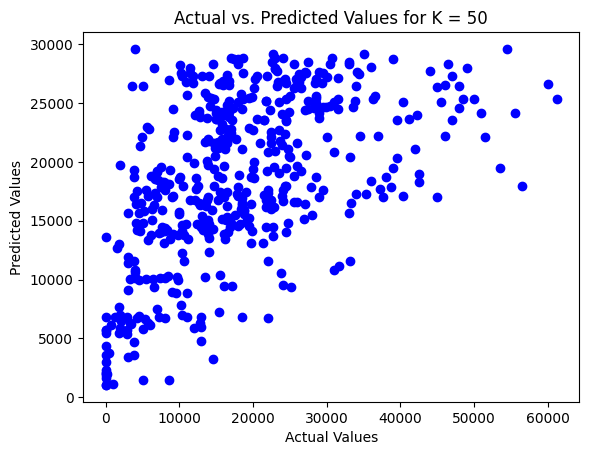

In [43]:
#For k = 50, doing KNN
model_k50 = kNNRegression(n_neighbors=50)
fitted_model_k50 = model_k50.fit(X_train,y_train)
y_hat_k50 = fitted_model_k50.predict(X_test)
#Finding the SSE
SSE_test_k50 = np.sum( (y_test-y_hat_k50)**2 )
print("SSE for k = 50: ", SSE_test_k50)
#Plot test against predicted values
plt.scatter(y_test, y_hat_k50, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for K = 50')
plt.show()

SSE for k = 100:  49135529480.4603


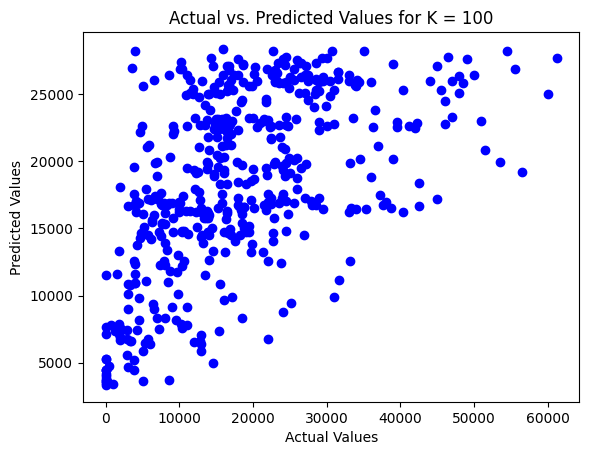

In [44]:
#For k = 100, doing KNN
model_k100 = kNNRegression(n_neighbors=100)
fitted_model_k100 = model_k100.fit(X_train,y_train)
y_hat_k100 = fitted_model_k100.predict(X_test)
#Finding the SSE
SSE_test_k100 = np.sum( (y_test-y_hat_k100)**2 )
print("SSE for k = 100: ", SSE_test_k100)
#Plot test against predicted values
plt.scatter(y_test, y_hat_k100, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for K = 100')
plt.show()

SSE for k = 300:  50238649457.106


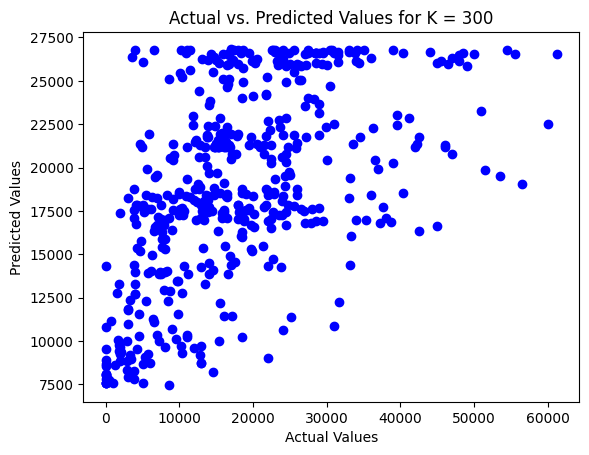

In [45]:
#For k = 300, doing KNN
model_k300 = kNNRegression(n_neighbors=300)
fitted_model_k300 = model_k300.fit(X_train,y_train)
y_hat_k300 = fitted_model_k300.predict(X_test)
#Finding the SSE
SSE_test_k300 = np.sum( (y_test-y_hat_k300)**2 )
print("SSE for k = 300: ", SSE_test_k300)
#Plot test against predicted values
plt.scatter(y_test, y_hat_k300, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for K = 300')
plt.show()

As you increase k, the SSE goes down until it reaches a certain value of k, in which it then begins increasing again.

2.5 Determine the optimal k for these data.

In [46]:
SSEs = {'3': SSE_test_k3, '10':SSE_test_k10, '25':SSE_test_k25, '50':SSE_test_k50, '100':SSE_test_k100, '300':SSE_test_k300}
# Find the key with the minimum SSE
min_sse_key = min(SSEs, key=SSEs.get)
# Extract the value of k from the key
optimal_k = int(min_sse_key)
print("Optimal value of k with minimum SSE:", optimal_k)

Optimal value of k with minimum SSE: 100


2.6 With smaller k, it seems as though the model is underfitting as the scatterplot shows points everywhere, though they should be closer to a y=x line. As k was larger, like for k = 300, it seems to be overfitting as the points on the scatterplot seem too closely aligned to the training data.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

3.1

In [6]:
df = pd.read_csv('/content/assignment3/data/heart_failure_clinical_records_dataset.csv')
df = df.drop('time', axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [7]:
df.isna().any().any() #No NAs

False

3.2 - It seems that age, ejection_fraction, and serum_creatinine are the most strongly associated to DEATH_EVENT.

In [8]:
correlation_matrix = df.corr()
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


3.3

In [75]:
var = 'DEATH_EVENT'
group = 'anaemia'
summary_table = df.loc[:, [var, group]].groupby(group).describe()
summary_table

DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0

In [77]:
var = 'DEATH_EVENT'
group = 'diabetes'
summary_table = df.loc[:, [var, group]].groupby(group).describe()
summary_table

DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0

In [78]:
var = 'DEATH_EVENT'
group = 'high_blood_pressure'
summary_table = df.loc[:, [var, group]].groupby(group).describe()
summary_table

DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.371429  0.485504  0.0  0.0  0.0  1.0  1.0

In [79]:
var = 'DEATH_EVENT'
group = 'sex'
summary_table = df.loc[:, [var, group]].groupby(group).describe()
summary_table

DEATH_EVENT                                             
          count      mean       std  min  25%  50%  75%  max
sex                                                         
0         105.0  0.323810  0.470173  0.0  0.0  0.0  1.0  1.0
1         194.0  0.319588  0.467523  0.0  0.0  0.0  1.0  1.0

In [80]:
var = 'DEATH_EVENT'
group = 'smoking'
summary_table = df.loc[:, [var, group]].groupby(group).describe()
summary_table

DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
smoking                                                         
0             203.0  0.325123  0.469579  0.0  0.0  0.0  1.0  1.0
1              96.0  0.312500  0.465946  0.0  0.0  0.0  1.0  1.0

A higher proportion of the population dies when the variables anaemia and high_blood_pressure takes the value 1 rather than 0.

2.4

In [37]:
y = df['DEATH_EVENT'] # Create target variable vector
X = df.loc[:,['anaemia','high_blood_pressure', 'age']] # Create feature matrix using variables that I think are most predictive of a death

2.5

In [38]:
X = X.apply(maxmin)

2.6

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

2.7

In [40]:
k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Optimal number of neighbors: ", k_star)

Optimal number of neighbors:  [12]


2.8

In [41]:
y = df['DEATH_EVENT'] # Create target variable vector
X = df # Create feature matrix using all variables
X = X.apply(maxmin)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

k_barall = 70
k_grid = np.arange(1,k_barall)
SSE_train = np.zeros(k_barall)
SSE_test = np.zeros(k_barall)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_minallvars = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_minallvars) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Optimal number of neighbors for all variables: ", k_star)
print("Sum Squared Error all variables: ", SSE_minallvars)
print("Sum Squared Error selected variables: ", SSE_min)

Optimal number of neighbors for all variables:  [1 2 3]
Sum Squared Error all variables:  0.0
Sum Squared Error selected variables:  12.159722222222223


The model with all of the variables selected had a lower Sum of Squared Errors. Although, in practice, I would rather use the model with the variables I selected because I know they are more indicative of death and it is less confusing to use certain variables rather than all of them.

In [33]:
#Playing with different variables

y = df['DEATH_EVENT'] # Create target variable vector
X = df.loc[:,['anaemia','high_blood_pressure', 'age', 'smoking', 'sex']] #selecting other variables
X = X.apply(maxmin)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Sum Squared Error: ", SSE_min)

Sum Squared Error:  12.548799999999998


In [34]:
#Playing with different variables

y = df['DEATH_EVENT'] # Create target variable vector
X = df.loc[:,['age', 'smoking', 'sex']] #selecting other variables
X = X.apply(maxmin)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Sum Squared Error: ", SSE_min)

Sum Squared Error:  11.840277777777777


In [35]:
#Playing with different variables

y = df['DEATH_EVENT'] # Create target variable vector
X = df.loc[:,['anaemia']] #selecting other variables
X = X.apply(maxmin)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("Sum Squared Error: ", SSE_min)

Sum Squared Error:  13.846944444444443


When I increase or decrease the amount of variables by ~2, the SSE doesn't seem to change that much - within 1 unit. However, I noticed that it was lower when I picked 'age', 'smoking', and 'sex'. This suggests to me that maybe I selected worse variables above for 2.4. More variables were not better in the first scenario I tested using 'anaemia','high_blood_pressure', 'age', 'smoking', and 'sex.' I expect this is because they are not all as relevant to predicting a death when combined. In the future, I would continue to try a selection of variables, refering back to the correlation matrix and summary tables above to fine-tune my feature matrix.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

6.1

In [9]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

6.2

In [5]:
import seaborn as sns

In [10]:
df0_125

,x1,x2,group
0,-0.749765,-0.188018,a
1,1.342680,0.450254,a
2,2.153036,0.059954,a
3,0.747564,0.172068,a
4,1.981321,1.108863,a
...,...,...,...
45,6.159969,2.124269,c
46,5.702185,3.117608,c
47,3.716095,2.041832,c
48,6.522308,1.118885,c


In [7]:
# Define a function to create scatterplots for a given dataset using sns.scatterplot
def plot_scatter(df, title):
    sns.scatterplot(x='x1', y='x2', hue='group', data=df)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.legend(title='Group', loc='upper right')
    plt.show()

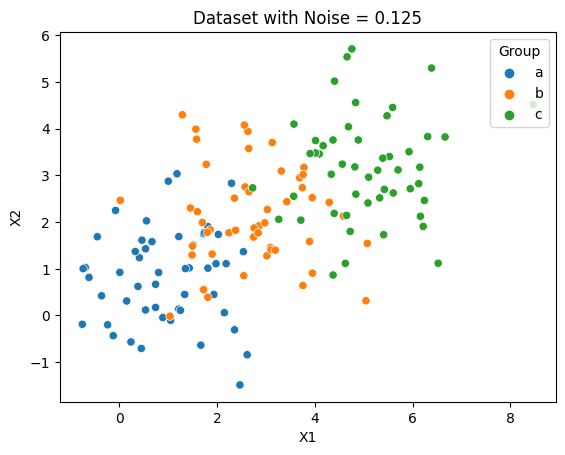

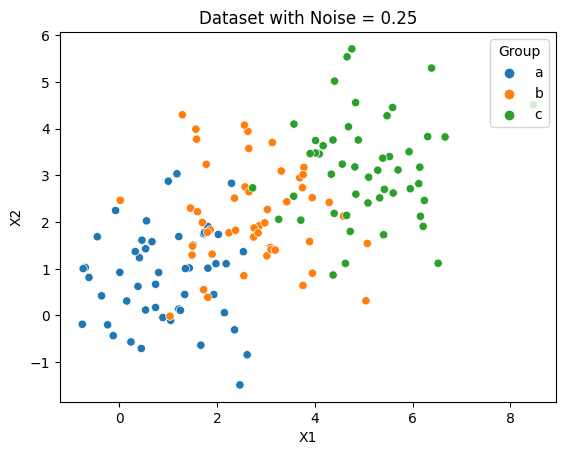

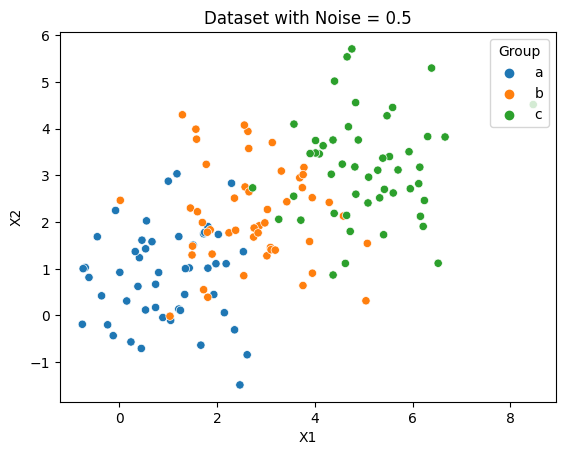

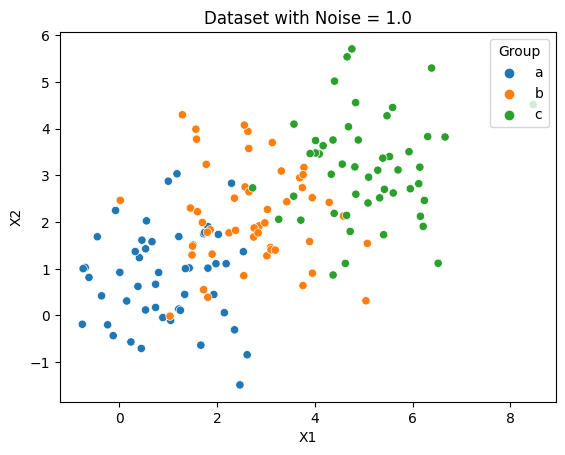

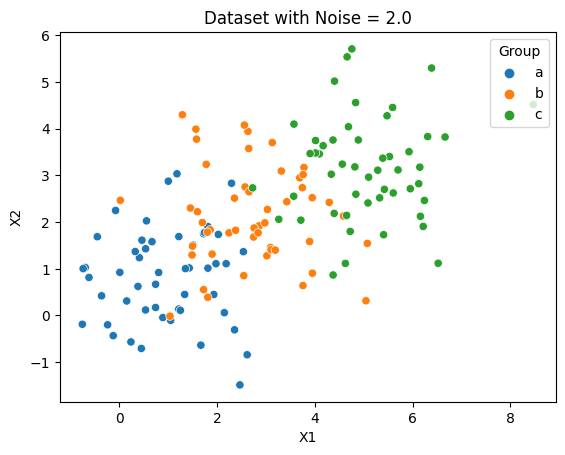

In [8]:
# Create scatterplots for each dataset
plot_scatter(df0_125, 'Dataset with Noise = 0.125')
plot_scatter(df0_25, 'Dataset with Noise = 0.25')
plot_scatter(df0_5, 'Dataset with Noise = 0.5')
plot_scatter(df1_0, 'Dataset with Noise = 1.0')
plot_scatter(df2_0, 'Dataset with Noise = 2.0')

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?